In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import mdtraj as md
import numpy as np

In [5]:
df = pd.read_csv('part2_unbiased_simulations_dialaA_COLVAR', sep='\s+', skiprows=5, header=None)

In [6]:
df.columns = ['time', 'phi', 'psi']

In [7]:
df.head(10)

,time,phi,psi
0,0.0,-1.257768,2.877951
1,1.0,-2.714986,2.432860
2,2.0,-2.340220,2.672415
3,3.0,-2.010501,2.706560
4,4.0,-1.848329,2.401884
5,5.0,-2.311322,2.271704
6,6.0,-2.479165,3.134684
7,7.0,-2.227371,2.872352
8,8.0,-1.770587,2.073850
9,9.0,-1.154633,0.989987


In [8]:
traj = md.load_xtc('part2_unbiased_simulations_dialaA.xtc', top='part2_unbiased_simulations_dialaA.gro')

In [9]:
phi_angles = md.compute_phi(traj)
psi_angles = md.compute_psi(traj)

In [10]:
md_phi_result = phi_angles[1].flatten()
md_psi_result = psi_angles[1].flatten()

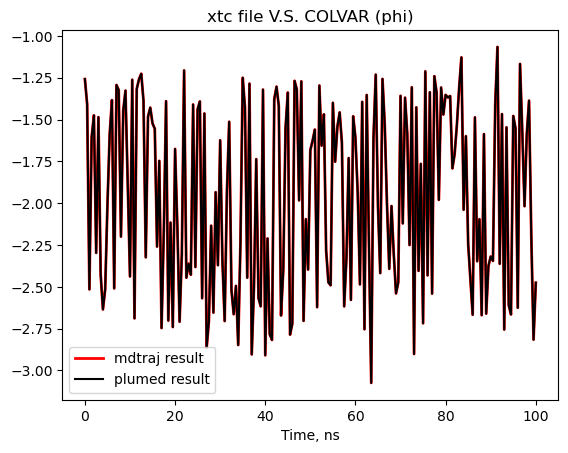

In [12]:
plt.figure()
plt.plot(df['time'][::500]/1000, md_phi_result[::500], color='red', label='mdtraj result', linewidth=2)
plt.plot(df['time'][::500]/1000, df['phi'][::500], color='black', label='plumed result')
plt.title("xtc file V.S. COLVAR (phi)")
plt.xlabel("Time, ns", fontsize=10)
plt.legend()
plt.savefig('xtc_vs_COLVAR_phi.png', dpi=500, bbox_inches='tight')
plt.show()

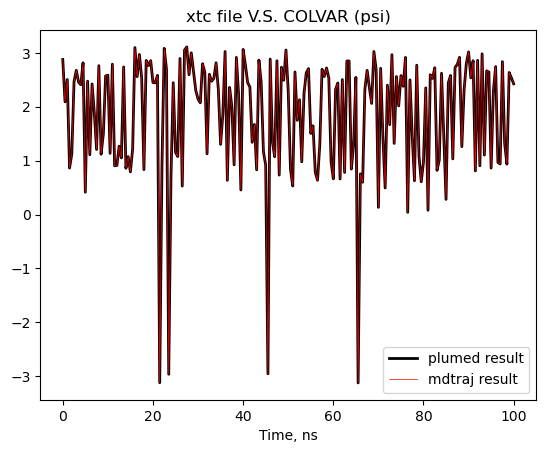

In [13]:
plt.figure()
plt.plot(df['time'][::500]/1000, df['psi'][::500], color='black', label='plumed result', linewidth=2)
plt.plot(df['time'][::500]/1000, md_psi_result[::500], color='red', label='mdtraj result', linewidth=0.5)
plt.title("xtc file V.S. COLVAR (psi)")
plt.legend()
plt.xlabel("Time, ns", fontsize=10)
plt.savefig('xtc_vs_COLVAR_psi.png', dpi=500, bbox_inches='tight')
plt.show()

In [14]:
STD_phi = np.std(df['phi'])
STD_phi

0.5538100218279406

In [15]:
STD_psi = np.std(df['psi'])
STD_psi

1.046185261851443